In [1]:
# required Python imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import funciones as f

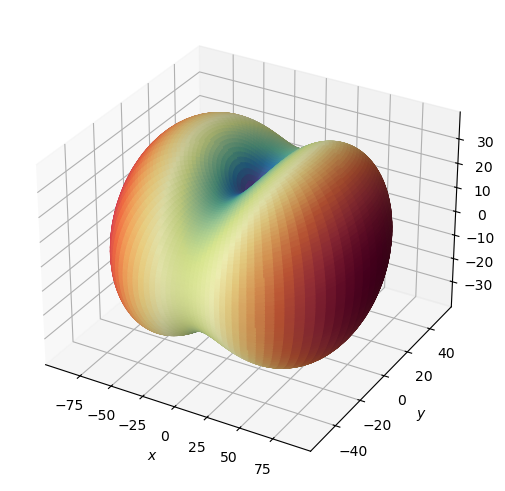

In [2]:
# generate a mesh of spherical/polar coordinates
polar, azimuths = f.regular_S2_grid(n_squared=100)

# estimate T values
T = f.Tvalues(trans=(90, 50, 20), azimuth=azimuths, polar=polar)

# convert from spherical to cartesian coordinates
x, y, z = f.sph2cart(T, azimuths, polar)

# normalize colors for T values to max and min values
Tmax, Tmin = T.max(), T.min()
Tcolors = (T - Tmin) / (Tmax - Tmin)

# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors))
_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

In [3]:
# vealues for an euler orientation of [75 90 45]
test1 = np.array([[36.5, 0.3, 90],
                  [45.9, 17.9, 90],
                  [51.9, 35.9, 90],
                  [51.9, 54.1, 90],
                  [45.9, 72.1, 90 ],
                  [36.3, 90.0, 90]])

# vealues for an euler orientation of [0 0 0]
test2 = np.array([[90.0, 0.0, 90],
                  [86.2, 18.09, 90],
                  [76.1, 36.1, 90],
                  [63.7, 54.1, 90],
                  [53.8, 72.1, 90 ],
                  [50.0, 90.2, 90]])

In [4]:
x1, y1, z1 = f.sph2cart(test1[:, 0], azimuth=np.deg2rad(test1[:, 1]), polar=np.deg2rad(test1[:, 2]))
x2, y2, z2 = f.sph2cart(test2[:, 0], azimuth=np.deg2rad(test2[:, 1]), polar=np.deg2rad(test2[:, 2]))

In [5]:
#%matplotlib qt

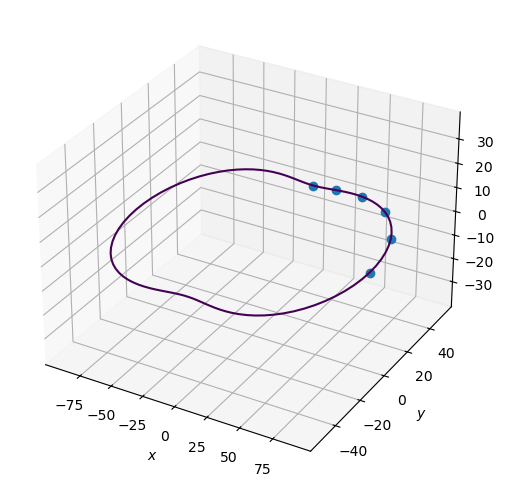

In [6]:
# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

#ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors), alpha=0.1)

# plot the contour z=0 of the transmission figure
ax.contour(x, y, z, [0])

# plot input data (fake mesurements)
ax.plot(np.around(x2, 1),
        np.around(y2, 1),
        np.around(z2, 1),
        'o')

_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')

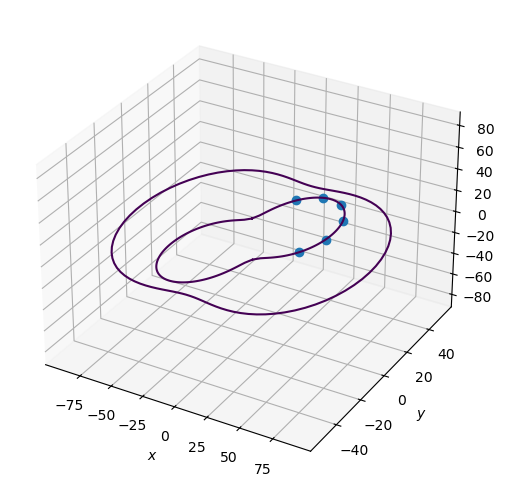

In [7]:
xr, yr, zr = f.rotate(coordinates=(x, y, z), euler_ang=(75, 90, 45))
xr2, yr2, zr2 = f.rotate(coordinates=(x, y, z), euler_ang=(0, 125, 80))

# make figure
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)
#ax.plot_surface(xr, yr, zr, rstride=1, cstride=1, facecolors=cm.Spectral_r(Tcolors), alpha=0.1)

# plot the contour z=0 of the transmission figure (for different orientations)
ax.contour(x, y, z, [0])     # euler (0,0,0)
ax.contour(xr, yr, zr, [0])  # euler (75,90,45), i.e. the real solution

# plot input data (fake mesurements)
ax.plot(np.around(x1, 1),
        np.around(y1, 1),
        np.around(z1, 1),
        'o')

_ = ax.set_xlabel(r'$x$'), ax.set_ylabel(r'$y$'), ax.set_zlabel(r'$z$')